# 1.DATA LOADING AND EXPLORING 

# 1.1 Importing the Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 1.2 Loading and Inspecting

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Inspect the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check the distribution of the target variable
print(df['target'].value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# 1.3 Data Visualization

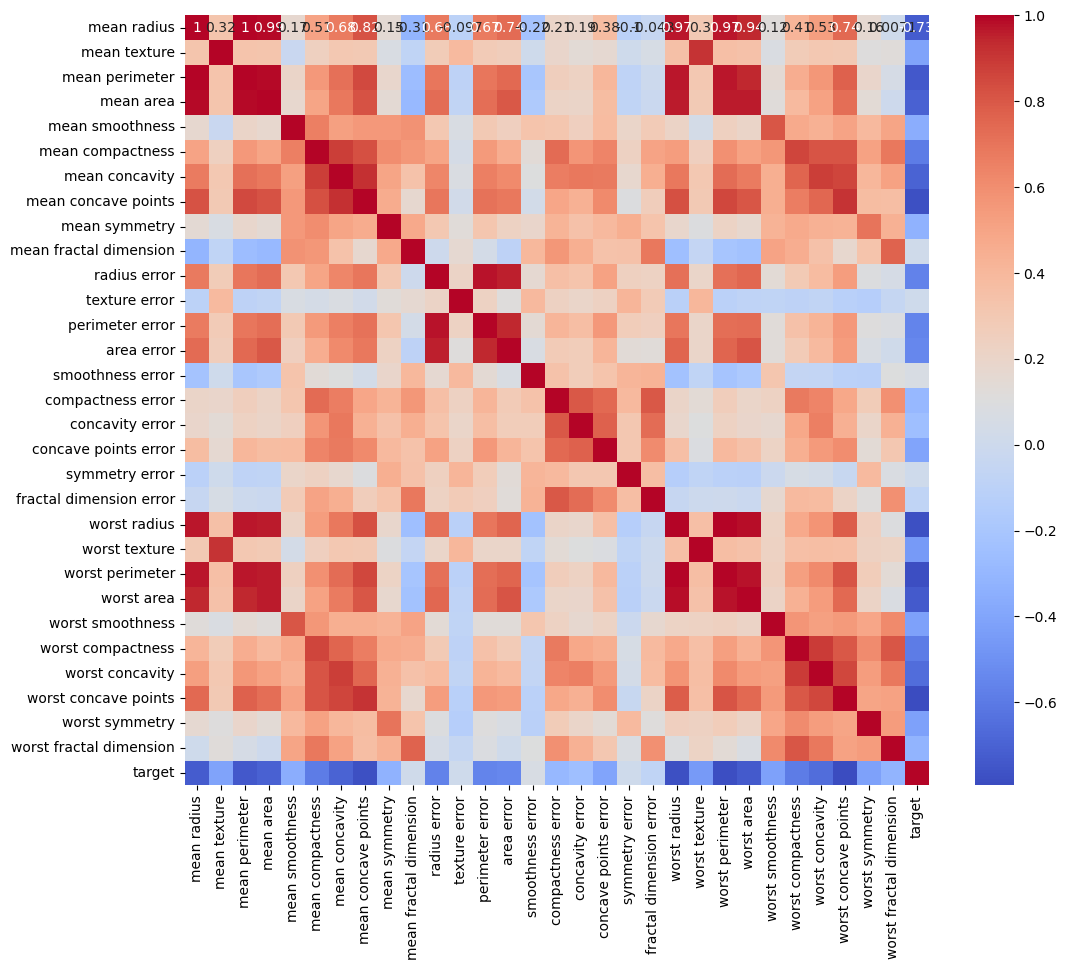

In [4]:
# Basic heatmap with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 2. Data Preprocessing

# 2.1 Feature Scaling 

In [13]:

# Assume df is your DataFrame
# Verify the presence of the 'target' column
if 'target' not in df.columns:
    raise ValueError("The DataFrame does not contain a 'target' column")

# Drop non-feature columns
X = df.drop(columns=['target'])
y = df['target']

# Check the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shapes of scaled features
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X shape: (569, 30)
y shape: (569,)
X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)


# 4. MODEL TRAINING

# 4.1 Logistic Regession

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))


Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 4.2 Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# 4.3 Suppoprt Vector Machine

In [16]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))


SVM Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 4.4 Gradient Boosting 

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
gb_y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_y_pred))
print(classification_report(y_test, gb_y_pred))


Gradient Boosting Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# 5.MODEL EVALUATION AND SELECTION

# 5.1 Cross-Validation

In [20]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation
scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Logistic Regression Cross-Validation Scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Mean Accuracy: 0.9736263736263737


# 5.2 Model Accuracy

In [21]:
# Fit the model on the training data
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
test_accuracy = lr_model.score(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9736842105263158


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 6. Result Analysis

# 6.1 Confusion Matrix

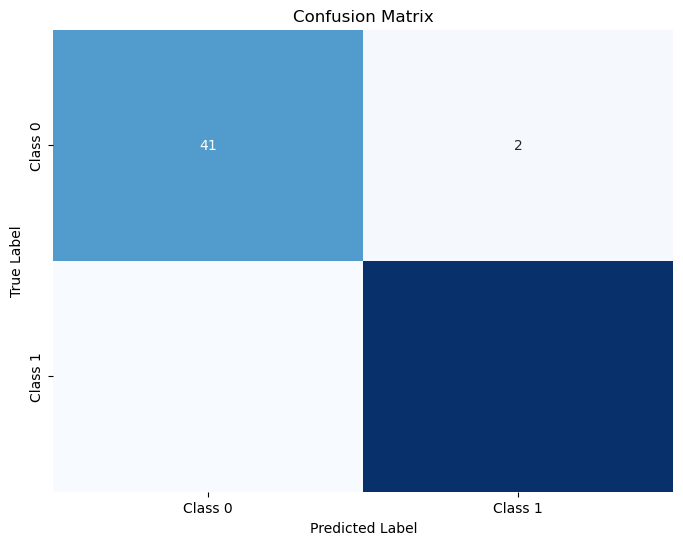

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# 6.2 ROC Curve and AUC

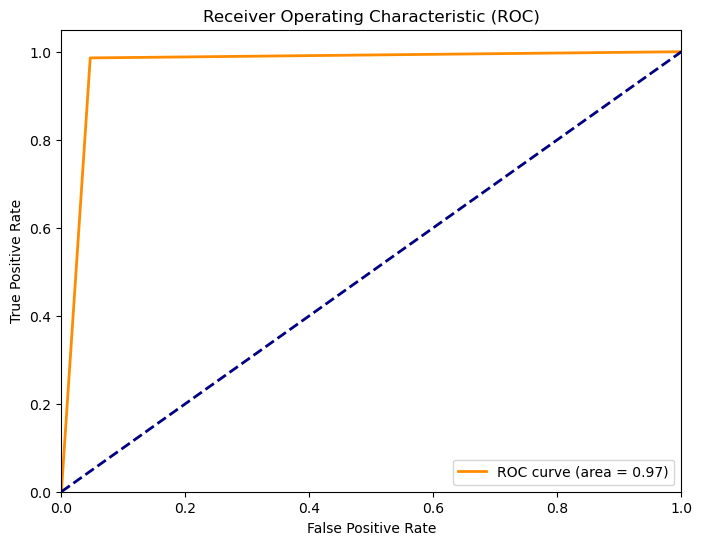

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# 6.3 Feature Importances

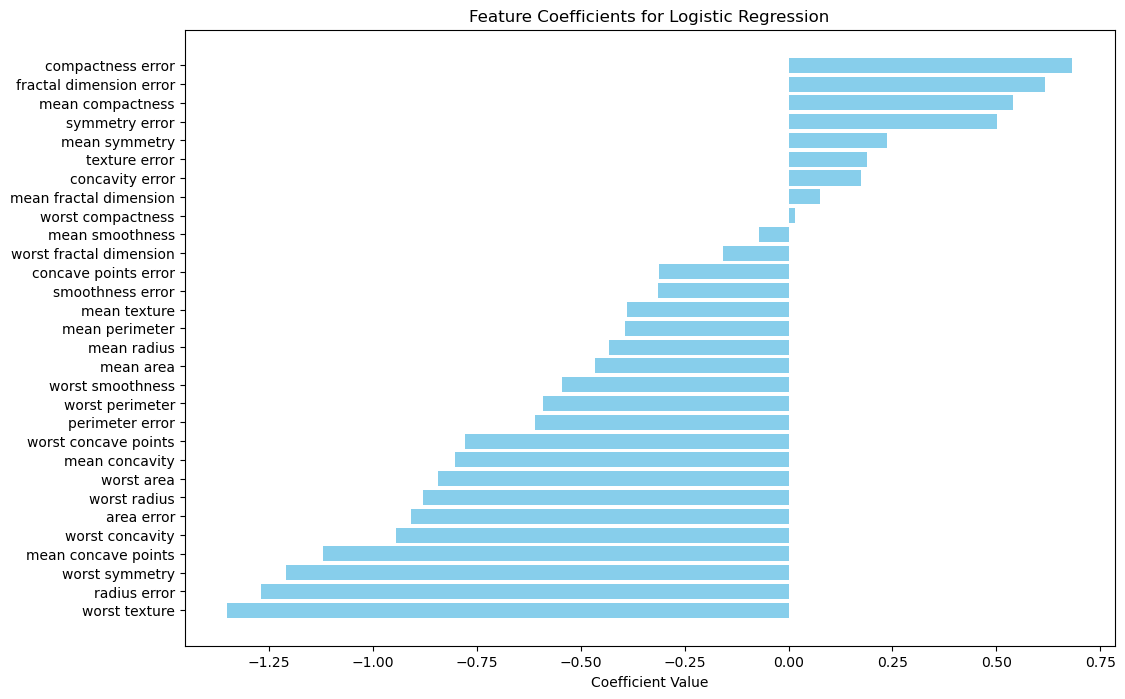

In [29]:
import numpy as np

# For Logistic Regression model
coefficients = lr_model.coef_[0]
features = X.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Logistic Regression')
plt.gca().invert_yaxis()
plt.show()


# 6.5 Model Performaces Summary Metrics

In [31]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Display performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

